# Attention to Detail of Hacker News Community Engagement

    
  This analysis is in short, an overview of the community engagement on Hacker News, a tech oriented site in which users can post articles and the community is able to upvote and/or comment on the article. The main focus that this analysis will answer are the questions below.

    1) Does the post type of `Ask HN` or `Show HN` get more comments on average?
    2) Do posts created at certain times garner more attention?
    
The dataset is comprised of an identification number for the post, a post title, in most cases a url, number of points (earned by upvotes minus downvotes), number of comments, author(user name) and a post creation time and date. There are approximately 20,000 rows.

Skip to the bottom for video analysis link.

In [1]:
import pandas as pd
hn = pd.read_csv('hacker_news.csv')
hn.head()

# imports, csv loads

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
4,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12


In [2]:
len(hn) # okay it's more than 20,000 rows but isn't that what approximately means? Right? RIGHT?

20100

In [3]:
hn['title'] = hn['title'].str.lower()

### Our first dive into the data is to find whether there are more comments on 'ask hn' posts or 'show hn'. 

Above, I normalized the case of the items in the title column just in case the 'ask hn' or the 'show hn' was capitilized abnormally.

In [4]:
hn.head() # checking to make sure change worked.

,id,title,url,num_points,num_comments,author,created_at
0,12224879,interactive dynamic video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,10975351,how to use open source and shut the fuck up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30
2,11964716,florida djs may face felony for april fools' w...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
3,11919867,technology ventures: from idea to enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
4,10301696,note by note: the making of steinway l1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12


In [5]:
ask_bool_map = hn[hn['title'].str.startswith('ask hn')]
ask_hn_rows = ask_bool_map[['id','title','url','num_points','num_comments','author','created_at']]

show_bool_map = hn[hn['title'].str.startswith('show hn')]
show_hn_rows = show_bool_map[['id','title','url','num_points','num_comments','author','created_at']]

Here is where I'm separating the posts classified as either 'ask hn' or 'show hn'.

In [6]:
len(show_hn_rows), len(ask_hn_rows) # length of the new show and ask dataframes

(1162, 1744)

In [7]:
ask_list = []
show_list = []
no_prefix_list = []
for i in hn['title']:
    if i.startswith('ask hn'):
        ask_list.append(i)
    elif i.startswith('show hn'):
        show_list.append(i)
    else:
        no_prefix_list.append(i)

In [8]:
[len(ask_list),len(show_list), len(no_prefix_list)] # proving to myself that it all adds up to the same total amount
# of rows

[1744, 1162, 17194]

In [9]:
hn['num_comments'].sum() # finding sums for proof later

498526

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

# dataviz time

In [11]:
comment_sums = [show_hn_rows['num_comments'].sum(),ask_hn_rows['num_comments'].sum()]
x_labels = ['show hn comment total', 'ask hn comment total']

In [12]:
print('The ' + str(x_labels[0]) + ' is ' + str(comment_sums[0]))
print('The ' + str(x_labels[1]) + ' is ' + str(comment_sums[1]))

The show hn comment total is 11988
The ask hn comment total is 24483


<BarContainer object of 2 artists>

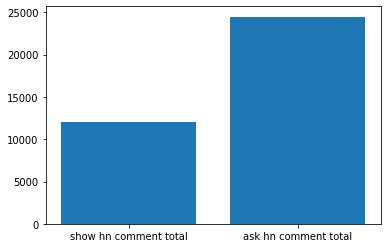

In [13]:
plt.bar(x_labels,comment_sums)

Here' it's clear that on a post categorized as 'ask' versus 'show' that there are more comments. 

My guess to this would be that there are more people trying to answer the user's 'ask' question on these posts.

However, since we do not have the complete set of data on what the comments were, I guess we'll never know......

![twilightzone](./twizone.gif)

Below the analysis continues to find whether posts created at certain times garner more or less attention.

In [14]:
hn['created_at'].head() # checking the format of strings in the created_at column

0     8/4/2016 11:52
1    1/26/2016 19:30
2    6/23/2016 22:20
3     6/17/2016 0:01
4     9/30/2015 4:12
Name: created_at, dtype: object

Instead of using the datetime module, I found my own way to classify which posts garnered more tracked attention.

In [19]:
time_and_points = pd.DataFrame([hn['created_at'],hn['num_points']])
time_and_comments = pd.DataFrame([hn['created_at'],hn['num_comments']])

In [20]:
time_and_comments.head()

,0,1,2,3,4,5,6,7,8,9,...,20090,20091,20092,20093,20094,20095,20096,20097,20098,20099
created_at,8/4/2016 11:52,1/26/2016 19:30,6/23/2016 22:20,6/17/2016 0:01,9/30/2015 4:12,10/31/2015 9:48,11/13/2015 0:45,8/16/2016 9:55,3/22/2016 16:18,10/13/2015 9:30,...,4/5/2016 19:31,11/18/2015 15:45,6/9/2016 16:49,10/17/2015 16:35,11/7/2015 11:27,8/29/2016 2:22,10/6/2015 14:57,1/2/2016 0:49,12/15/2015 19:32,5/12/2016 1:43
num_comments,52,10,1,1,2,22,4,6,7,10,...,2,41,1,70,2,6,1,132,222,58


In [37]:
def cut_date(col_item):
    col_item = col_item.split(' ')
    col_item = col_item[1]
    col_item = col_item.split(':')
    col_item = col_item[0]
    return col_item

# gleaning the hour from the date string

In [22]:
cut_date(time_and_comments[1][0])

'19'

In [23]:
hour_bucket = {'0':0,
               '1':0,
               '2':0,
               '3':0, 
               '4':0, 
               '5':0,
               '6':0,
               '7':0,
               '8':0,
               '9':0,
               '10':0,
               '11':0,
               '12':0,
               '13':0,
               '14':0,
               '15':0,
               '16':0,
               '17':0,
               '18':0,
               '19':0,
               '20':0,
               '21':0,
               '22':0,
               '23':0,
              }

In [24]:
for i in time_and_comments:
    cdate = cut_date(time_and_comments[i][0])
    hour_bucket[cdate] += 1

In [25]:
a = {'4':0,'04':0}

for i in time_and_comments:
    if cut_date(time_and_comments[i][0]) == '4':
        a['4'] += 1
    elif cut_date(time_and_comments[i][0]) == '04':
        a['04'] += 1

In [26]:
a

{'4': 527, '04': 0}

In [27]:
b = {'i':0}
for i in 'mississipi':
    if i == 'i':
        b['i'] += 1

In [38]:
b # sanity check...

{'i': 4}

In [29]:
hour_bucket

{'0': 697,
 '1': 588,
 '2': 529,
 '3': 488,
 '4': 527,
 '5': 453,
 '6': 468,
 '7': 508,
 '8': 578,
 '9': 609,
 '10': 686,
 '11': 762,
 '12': 923,
 '13': 1102,
 '14': 1151,
 '15': 1234,
 '16': 1302,
 '17': 1362,
 '18': 1254,
 '19': 1145,
 '20': 1051,
 '21': 1030,
 '22': 875,
 '23': 778}

Above and below you'll see the amount of posts created at the separate hours of the day, 0 being midnight all the way up to 23 being 11pm. It looks like the most popular time was around 5 pm. 

<BarContainer object of 24 artists>

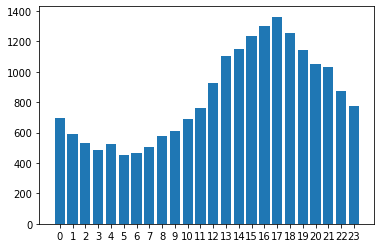

In [30]:
plt.bar(hour_bucket.keys(),hour_bucket.values())

In [31]:
comment_hour_bucket = {'0':0,
               '1':0,
               '2':0,
               '3':0, 
               '4':0, 
               '5':0,
               '6':0,
               '7':0,
               '8':0,
               '9':0,
               '10':0,
               '11':0,
               '12':0,
               '13':0,
               '14':0,
               '15':0,
               '16':0,
               '17':0,
               '18':0,
               '19':0,
               '20':0,
               '21':0,
               '22':0,
               '23':0,
              }


for i in time_and_comments:
    temp_v = cut_date(time_and_comments[i][0])
    comment_hour_bucket[temp_v] += time_and_comments[i][1]
    
comment_hour_bucket

{'0': 17478,
 '1': 12465,
 '2': 13762,
 '3': 11626,
 '4': 11537,
 '5': 10290,
 '6': 9253,
 '7': 12576,
 '8': 14062,
 '9': 15274,
 '10': 16818,
 '11': 20664,
 '12': 25351,
 '13': 30562,
 '14': 33545,
 '15': 35809,
 '16': 30857,
 '17': 34784,
 '18': 31587,
 '19': 27894,
 '20': 23414,
 '21': 22652,
 '22': 18684,
 '23': 17582}

In [32]:
hn['num_comments'].sum() # proof check

498526

In [33]:
c = 0
for i in comment_hour_bucket:
    c += comment_hour_bucket[i]
    
c # proof against the proof above

498526

Below we can see that the most popular comment times orbit right around the most popular post creation times as well, and it generally follows the same pattern overall. This makes me think that commenters have notifications set up or are regular users some how.

<BarContainer object of 24 artists>

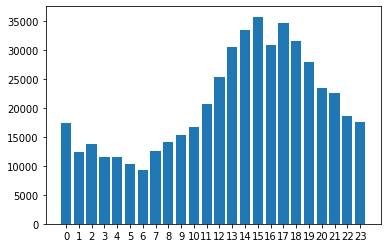

In [34]:
plt.bar(comment_hour_bucket.keys(),comment_hour_bucket.values())

<BarContainer object of 24 artists>

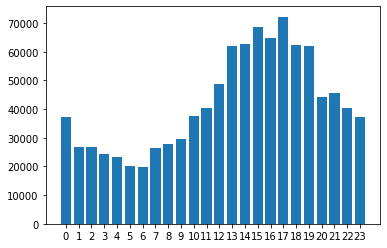

In [35]:
points_hours_bucket = { 
               '0':0,
               '1':0,
               '2':0,
               '3':0, 
               '4':0, 
               '5':0,
               '6':0,
               '7':0,
               '8':0,
               '9':0,
               '10':0,
               '11':0,
               '12':0,
               '13':0,
               '14':0,
               '15':0,
               '16':0,
               '17':0,
               '18':0,
               '19':0,
               '20':0,
               '21':0,
               '22':0,
               '23':0,
    
}

for i in time_and_points:
    temp = cut_date(time_and_points[i][0])
    points_hours_bucket[temp] += time_and_points[i][1]
    
plt.bar(points_hours_bucket.keys(),points_hours_bucket.values())

Above we can see that again, the pattern of upvotes on posts follows the time posts are created **and** the number of comments on posts. 

Below, to paint the results together, I have combined them all on a single graph to show how similar the patterns are. The lowest number (barely seen, in green) is the number of posts created in those specific hour buckets. The orange is the number of comments made in those hour buckets, and the blue is the number of points (upvotes minus downvotes) on those posts **in** those hour buckets. The pattern is quite consistent all the way through and we can see that across the board, posts are generally posted around late afternoon and early evening with all the activity of commenting and voting happening around those times as well.

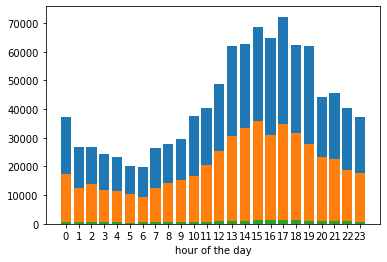

In [36]:
points = list(points_hours_bucket.values())
comments = list(comment_hour_bucket.values())
posts_created = list(hour_bucket.values())

position_on_x = list(comment_hour_bucket.keys())
hour_groups = list(comment_hour_bucket.keys())

bar_widt = 1

plt.bar(position_on_x, points)
plt.bar(position_on_x, comments)
plt.bar(position_on_x, posts_created)

plt.xticks(position_on_x, hour_groups)
plt.xlabel('hour of the day')

plt.show()

[Link to video analysis](https://www.loom.com/share/c3c3f8383bc74d8abf753e599a5ef253)